In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# Xopt class, GPT CBETA DC GUN example

This is the class method for running Xopt.

In [9]:
from xopt import Xopt
from matplotlib import pyplot as plt
import numpy as np

In [3]:
import yaml

# Make a proper input file. 

YAML="""
xopt: {output_path: null, verbose: true,
  algorithm: cnsga}
  
algorithm:
  name: cnsga
  options: {max_generations: 25, population_size: 24, crossover_probability: 0.9, mutation_probability: 1.0,
  selection: auto, verbose: true, population: null}

simulation:
  name: gpt_with_distgen
  evaluate: gpt.evaluate.evaluate_gpt_with_distgen

# Note that you can call another file in the top level group:
vocs: /Users/colwyngulliford/Documents/GitHub/xopt/examples/cbeta.dcgun/cbeta.dcgun.vocs.json

"""
config = yaml.safe_load(YAML)

In [4]:
# Create object
X = Xopt(config=config)

# Show config
X


            Xopt
________________________________           

Configured: True

Config as YAML:
xopt: {output_path: null, verbose: true, algorithm: cnsga}
algorithm:
  name: cnsga
  options: {max_generations: 25, population_size: 24, crossover_probability: 0.9,
    mutation_probability: 1.0, selection: auto, verbose: true, seed: null}
  max_generations: 25
  population_size: 24
  crossover_probability: 0.9
  mutation_probability: 1.0
  selection: auto
  verbose: true
  seed: null
simulation: {name: gpt_with_distgen, evaluate: gpt.evaluate.evaluate_gpt_with_distgen}
vocs:
  constants: {gun_voltage: 375}
  constraints:
    end_std_t: [LESS_THAN, 0.0015]
  description: Test case
  name: CBETA DC GUN
  objectives: {end_norm_emitt_x: MINIMIZE, end_qbunch: MAXIMIZE}
  simulation: gpt_with_distgen
  templates: {distgen_input_file: /Users/colwyngulliford/Documents/GitHub/xopt/examples/cbeta.dcgun/template/cbeta.dcgun.distgen.in.json,
    gpt_input_file: /Users/colwyngulliford/Documents/GitHub

In [27]:
# Check vocs
X.vocs

{'constants': {'gun_voltage': 375},
 'constraints': {'end_std_t': ['LESS_THAN', 0.0015]},
 'description': 'Test case',
 'name': 'CBETA DC GUN',
 'objectives': {'end_norm_emitt_x': 'MINIMIZE', 'end_qbunch': 'MAXIMIZE'},
 'simulation': 'gpt_with_distgen',
 'templates': {'distgen_input_file': '/Users/colwyngulliford/Documents/GitHub/xopt/examples/cbeta.dcgun/template/cbeta.dcgun.distgen.in.json',
  'gpt_input_file': '/Users/colwyngulliford/Documents/GitHub/xopt/examples/cbeta.dcgun/template/cbeta.dcgun.gpt.in'},
 'variables': {'beam:params:sigma_xy:value': [0, 5],
  'beam:params:total_charge:value': [0, 500],
  'sol_1_current': [0, 5]},
 'linked_variables': None}

In [28]:
# Check random inputs
X.random_inputs()

{'beam:params:sigma_xy:value': 2.190673204735027,
 'beam:params:total_charge:value': 165.92422326857903,
 'sol_1_current': 1.9937249526832606,
 'gun_voltage': 375}

In [29]:
%%time
# Do a random evaluate to check that everything will run
x=X.random_evaluate()
print(x)

{'error': False, 'end_std_x': 0.01921340641475445, 'end_std_y': 0.01955310634932044, 'end_qbunch': 1.63033496354662e-10, 'end_norm_emitt_x': 3.992794078198379e-06, 'end_norm_emitt_y': 3.8021131068704507e-06, 'end_std_t': 2.4058849806584882e-11, 'fingerprint': '7aabc42611db5826d8986a0fce3e5499'}
CPU times: user 131 ms, sys: 41.7 ms, total: 173 ms
Wall time: 2.54 s


In [30]:
# These are the algorithm options
X.algorithm['options']

{'max_generations': 25,
 'population_size': 24,
 'crossover_probability': 0.9,
 'mutation_probability': 1.0,
 'selection': 'auto',
 'verbose': True,
 'seed': None}

In [8]:
# These are the options in the evaluate function
X.simulation['options']

{'archive_path': None,
 'merit_f': None,
 'distgen_input_file': '/Users/colwyngulliford/Documents/GitHub/xopt/examples/cbeta.dcgun/template/cbeta.dcgun.distgen.in.json',
 'gpt_input_file': '/Users/colwyngulliford/Documents/GitHub/xopt/examples/cbeta.dcgun/template/cbeta.dcgun.gpt.in'}

# Run CNSGA using processes or threads

In [9]:
from concurrent.futures import ProcessPoolExecutor as PoolExecutor
#from concurrent.futures import ThreadPoolExecutor as PoolExecutor
executor = PoolExecutor()

In [10]:
X.run_cnsga(executor)

{'max_generations': 25, 'population_size': 24, 'crossover_probability': 0.9, 'mutation_probability': 1.0, 'selection': 'auto', 'verbose': True, 'seed': None}



 ▄████▄   ███▄    █   ██████   ▄████  ▄▄▄      
▒██▀ ▀█   ██ ▀█   █ ▒██    ▒  ██▒ ▀█▒▒████▄    
▒▓█    ▄ ▓██  ▀█ ██▒░ ▓██▄   ▒██░▄▄▄░▒██  ▀█▄  
▒▓▓▄ ▄██▒▓██▒  ▐▌██▒  ▒   ██▒░▓█  ██▓░██▄▄▄▄██ 
▒ ▓███▀ ░▒██░   ▓██░▒██████▒▒░▒▓███▀▒ ▓█   ▓██▒
░ ░▒ ▒  ░░ ▒░   ▒ ▒ ▒ ▒▓▒ ▒ ░ ░▒   ▒  ▒▒   ▓▒█░
  ░  ▒   ░ ░░   ░ ▒░░ ░▒  ░ ░  ░   ░   ▒   ▒▒ ░
░           ░   ░ ░ ░  ░  ░  ░ ░   ░   ░   ▒   
░ ░               ░       ░        ░       ░  ░
░                                              


Continous Non-dominated Sorting Genetic Algorithm


Creating toolbox from vocs.
Created toolbox with 3 variables, 1 constraints, and 2 objectives.
    Using selection algorithm: nsga2
vocs:
{'constants': {'gun_voltage': 375},
 'constraints': {'end_std_t': ['LESS_THAN', 0.0015]},
 'description': 'Test case',
 'linked_variables': None,
 'name': 'CBETA DC GU

In [11]:
# Check for errors
X.population['errors']

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

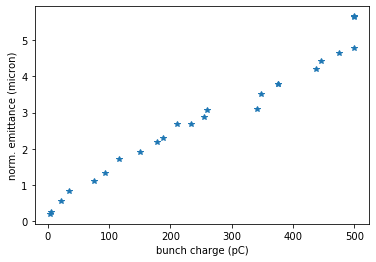

In [12]:
plt.plot(np.array(X.population['outputs']['end_qbunch'])*1e12, np.array(X.population['outputs']['end_norm_emitt_x'])*1e6,'*')
plt.xlabel('bunch charge (pC)')
plt.ylabel('norm. emittance (micron)')
plt.show()

# Write this configuration

In [13]:
X.save('test.yaml')

Config written as YAML to test.yaml


In [14]:
!cat test.yaml

xopt: {output_path: null, verbose: true, algorithm: cnsga}
algorithm:
  name: cnsga
  options: {max_generations: 25, population_size: 24, crossover_probability: 0.9,
    mutation_probability: 1.0, selection: auto, verbose: true, seed: null}
  max_generations: 25
  population_size: 24
  crossover_probability: 0.9
  mutation_probability: 1.0
  selection: auto
  verbose: true
  seed: null
simulation: {name: gpt_with_distgen, evaluate: gpt.evaluate.evaluate_gpt_with_distgen}
vocs:
  constants: {gun_voltage: 375}
  constraints:
    end_std_t: [LESS_THAN, 0.0015]
  description: Test case
  name: CBETA DC GUN
  objectives: {end_norm_emitt_x: MINIMIZE, end_qbunch: MAXIMIZE}
  simulation: gpt_with_distgen
  templates: {distgen_input_file: /Users/colwyngulliford/Documents/GitHub/xopt/examples/cbeta.dcgun/template/cbeta.dcgun.distgen.in.json,
    gpt_input_file: /Users/colwyngulliford/Documents/GitHub/xopt/examples/cbeta.dcgun/template/cbeta.dcgun.gpt.in}
  variables:
    beam:params:sigma_xy:val

# Run with MPI

In [16]:
!mpirun -n 4 python -m mpi4py.futures -m xopt.mpi.run test.yaml

  _   
                | |  
__  _____  _ __ | |_ 
\ \/ / _ \| '_ \| __|
 >  < (_) | |_) | |_ 
/_/\_\___/| .__/ \__|
          | |        
          |_|        

_________________________________
Parallel execution with 4 workers
Loading /Users/colwyngulliford/Documents/GitHub/xopt/examples/xopt_class/test.yaml as YAML 

{'max_generations': 25, 'population_size': 24, 'crossover_probability': 0.9, 'mutation_probability': 1.0, 'selection': 'auto', 'verbose': True, 'seed': None}



 ▄████▄   ███▄    █   ██████   ▄████  ▄▄▄      
▒██▀ ▀█   ██ ▀█   █ ▒██    ▒  ██▒ ▀█▒▒████▄    
▒▓█    ▄ ▓██  ▀█ ██▒░ ▓██▄   ▒██░▄▄▄░▒██  ▀█▄  
▒▓▓▄ ▄██▒▓██▒  ▐▌██▒  ▒   ██▒░▓█  ██▓░██▄▄▄▄██ 
▒ ▓███▀ ░▒██░   ▓██░▒██████▒▒░▒▓███▀▒ ▓█   ▓██▒
░ ░▒ ▒  ░░ ▒░   ▒ ▒ ▒ ▒▓▒ ▒ ░ ░▒   ▒  ▒▒   ▓▒█░
  ░  ▒   ░ ░░   ░ ▒░░ ░▒  ░ ░  ░   ░   ▒   ▒▒ ░
░           ░   ░ ░ ░  ░  ░  ░ ░   ░   ░   ▒   
░ ░               ░       ░        ░       ░  ░
░                                              


Continous Non-dominated Sorting Ge

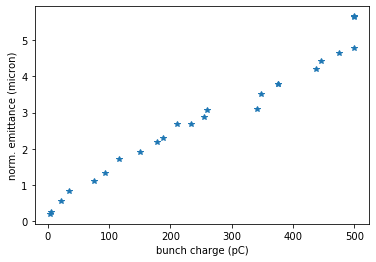

In [18]:
plt.plot(np.array(X.population['outputs']['end_qbunch'])*1e12, np.array(X.population['outputs']['end_norm_emitt_x'])*1e6,'*')
plt.xlabel('bunch charge (pC)')
plt.ylabel('norm. emittance (micron)')
plt.show()

# Dask 

In [5]:
from dask.distributed import Client
executor = Client()
executor

Client Scheduler: tcp://127.0.0.1:58746 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 17.18 GB


In [6]:
# Wait a few seconds for the Dask cluster to start
from time import sleep
sleep(5)

In [7]:
# Increase the number of generations
X.run_cnsga(executor)

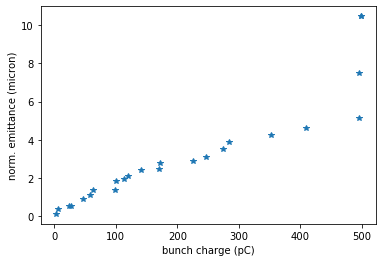

In [12]:
plt.plot(np.array(X.population['outputs']['end_qbunch'])*1e12, np.array(X.population['outputs']['end_norm_emitt_x'])*1e6,'*')
plt.xlabel('bunch charge (pC)')
plt.ylabel('norm. emittance (micron)')
plt.show()

In [11]:
# Cleanup

In [22]:
!rm -r dask-worker-space

In [23]:
!rm test.yaml